/usr/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


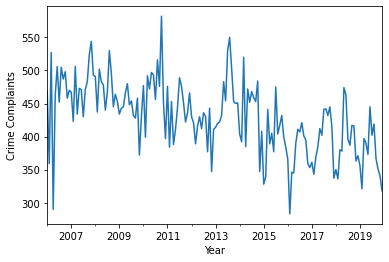

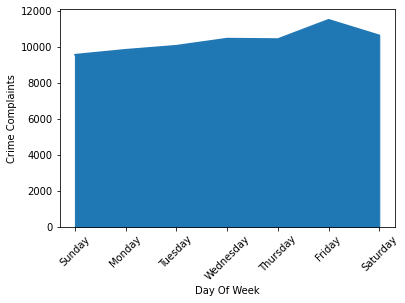

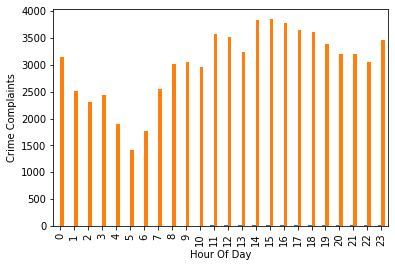

In [107]:
import datetime
import griddb_python as griddb
import sys
import pandas as pd
import matplotlib.pyplot as plt


factory = griddb.StoreFactory.get_instance()

argv = sys.argv

gridstore = factory.get_store(
    host="239.0.0.1",
    port=31999,
    cluster_name="defaultCluster",
    username="admin",
    password="admin"
)

col = gridstore.get_container("precinct_108")

start = datetime.datetime.utcnow().timestamp() 
query = col.query("select *")
rs = query.fetch(False)
df = rs.fetch_rows()
df['CMPLNT_FR'] = pd.to_datetime(df['CMPLNT_FR'])
df = df.rename(columns={'CMPLNT_FR':'timestamp'})

monthly_df = df.groupby([pd.Grouper(key='timestamp',freq='M')]).size().reset_index(name='count')
monthly_df = monthly_df.set_index('timestamp')
ts = monthly_df['count']
ax = ts['2006':].plot()
ax.set_xlabel('Year')
ax.set_ylabel('Crime Complaints')
ax.set_xlabel('Year')


df['precinct'] = 108
df['key'] = df['CMPLNT_FR'].dt.strftime('%Y-%m-%d') +"_"+ df['precinct'].astype('str')

conInfo = griddb.ContainerInfo("DFF_AGGS",
                [["key", griddb.Type.STRING], 
                ["timestamp", griddb.Type.TIMESTAMP],
                ["precinct", griddb.Type.INTEGER],
                ["count", griddb.Type.INTEGER]],
            griddb.ContainerType.COLLECTION, True)

#aggcn = gridstore.put_container(conInfo)
#aggcn.put_rows(df[["key", "timestamp","precinct","count"]])


#print(df)
#conInfo = griddb.ContainerInfo("P108_AGGS",
#                [["CMPLNT_FR", griddb.Type.TIMESTAMP], 
#                ["count", griddb.Type.INTEGER]],
#            griddb.ContainerType.TIME_SERIES, True)
#aggcn = gridstore.put_container(conInfo)
#aggcn.put_rows(df)


#print("df "+  str(datetime.datetime.utcnow().timestamp() - start) +" seconds")
weekly_df = rows.groupby(rows['timestamp'].dt.day_name()).size().reset_index(name='count')
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday']
ax = weekly_df.set_index('timestamp').loc[order].plot(kind='area')
ax.set_xlabel('Day Of Week')
ax.set_ylabel('Crime Complaints')
plt.xticks(rotation=45)
ax.get_legend().remove()
plt.show()

hourly_df  = rows.groupby(rows['timestamp'].dt.hour).size().reset_index(name='count')
ax = hourly_df.plot.bar()
ax.set_xlabel('Hour Of Day')
ax.set_ylabel('Crime Complaints')
ax.get_legend().remove()
plt.show()




In [85]:
import datetime
import griddb_python as griddb
import sys
import pandas as pd
import traceback
import matplotlib.pyplot as plt
import statsmodels
import itertools
from dateutil.relativedelta import relativedelta

factory = griddb.StoreFactory.get_instance()
argv = sys.argv

gridstore = factory.get_store(
        host="239.0.0.1",
        port=31999,
        cluster_name="defaultCluster",
        username="admin",
        password="admin"
)


tqls=[]
dt =  datetime.datetime(2000, 1, 1, 0, 0, 0)
while dt < datetime.datetime(2020, 1, 1, 0, 0):
    start = int(dt.timestamp()*1000)
    end = int((dt + relativedelta(months=+1)).timestamp()*1000)
    query = "select count(*) where CMPLNT_FR > TO_TIMESTAMP_MS("+str(start)+")"
    query = query + " AND CMPLNT_FR < TO_TIMESTAMP_MS("+str(end)+")"
    tqls.append([dt, query])
    dt = dt + relativedelta(months=+1);

col = gridstore.get_container("precinct_108")
start = datetime.datetime.utcnow().timestamp() 

for tql in tqls:
    q = col.query(tql[1])
    rs = q.fetch(False)
    if rs.has_next():
        data = rs.next()
        count = data.get(griddb.Type.LONG)
        print([str(tql[0].timestamp()), count ])
print("forloop "+  str(datetime.datetime.utcnow().timestamp() - start) +" seconds")


['946684800.0', 2]
['949363200.0', 1]
['951868800.0', 1]
['954543600.0', 0]
['957135600.0', 1]
['959814000.0', 0]
['962406000.0', 3]
['965084400.0', 1]
['967762800.0', 0]
['970354800.0', 0]
['973036800.0', 1]
['975628800.0', 2]
['978307200.0', 2]
['980985600.0', 0]
['983404800.0', 0]
['986079600.0', 1]
['988671600.0', 1]
['991350000.0', 3]
['993942000.0', 1]
['996620400.0', 2]
['999298800.0', 0]
['1001890800.0', 0]
['1004572800.0', 2]
['1007164800.0', 2]
['1009843200.0', 2]
['1012521600.0', 0]
['1014940800.0', 2]
['1017615600.0', 1]
['1020207600.0', 0]
['1022886000.0', 0]
['1025478000.0', 2]
['1028156400.0', 0]
['1030834800.0', 0]
['1033426800.0', 2]
['1036108800.0', 1]
['1038700800.0', 1]
['1041379200.0', 1]
['1044057600.0', 1]
['1046476800.0', 3]
['1049151600.0', 3]
['1051743600.0', 1]
['1054422000.0', 1]
['1057014000.0', 3]
['1059692400.0', 2]
['1062370800.0', 4]
['1064962800.0', 2]
['1067644800.0', 2]
['1070236800.0', 0]
['1072915200.0', 4]
['1075593600.0', 1]
['1078099200.0', 0]
[

In [ ]:
import datetime
import griddb_python as griddb
import sys
import pandas

factory = griddb.StoreFactory.get_instance()

argv = sys.argv

gridstore = factory.get_store(
    host="239.0.0.1",
    port=31999,
    cluster_name="defaultCluster",
    username="admin",
    password="admin"
)

col = gridstore.get_container("col01")


start =  datetime.datetime.utcnow().timestamp()
query = col.query("select *")
rs = query.fetch(False)
result = []
while rs.has_next():
    result.append(rs.next())
df = pandas.DataFrame(result, columns=["name", "status", "count", "lob"])
print("pyarray "+  str(datetime.datetime.utcnow().timestamp() - start) +" seconds")


start =  datetime.datetime.utcnow().timestamp()
query = col.query("select *")
rs = query.fetch(False)
result = rs.fetch_rows()
print("pandas "+  str(datetime.datetime.utcnow().timestamp() - start) +" seconds")



In [ ]:
import griddb_python
import sys
import time
import re
import datetime
import uuid
import random
import pandas

griddb = griddb_python
factory = griddb.StoreFactory.get_instance()

gridstore = factory.get_store(
    host="239.0.0.1",
    port=31999,
    cluster_name="defaultCluster",
    username="admin",
    password="admin"
)

gridstore.get_container("col00")

blob = bytearray([65, 66, 67, 68, 69, 70, 71, 72, 73, 74])
conInfo = griddb.ContainerInfo("col01",
    [["name", griddb.Type.STRING],
	["status", griddb.Type.BOOL],
	["count", griddb.Type.LONG],
	["lob", griddb.Type.BLOB]],
	griddb.ContainerType.COLLECTION, True)

i=0
rows=[]
while i < 10000:
    rows.append([str(uuid.uuid1()), False, random.randint(0, 1048576), blob])
    i=i+1

gridstore.drop_container("col01")
start =  datetime.datetime.utcnow().timestamp()
col = gridstore.put_container(conInfo)
col.multi_put(rows)
print("multiput put took "+  str(datetime.datetime.utcnow().timestamp() - start) +" seconds")


df = pandas.DataFrame(rows, columns=["name", "status", "count", "lob"])
print(df)

gridstore.drop_container("col01")
start =  datetime.datetime.utcnow().timestamp()
col = gridstore.put_container(conInfo)
col.put_rows(df)
col.multi_put(rows)
print("putrows took "+  str(datetime.datetime.utcnow().timestamp() - start) +" seconds")